In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

==================== Поиск с помощью регулярного симплекса ====================
eps =  1e-05
x* =  1.578125 -4.744714698342668
f(x*) =  -71.99987155360614
iterations =  25
counter_F =  68


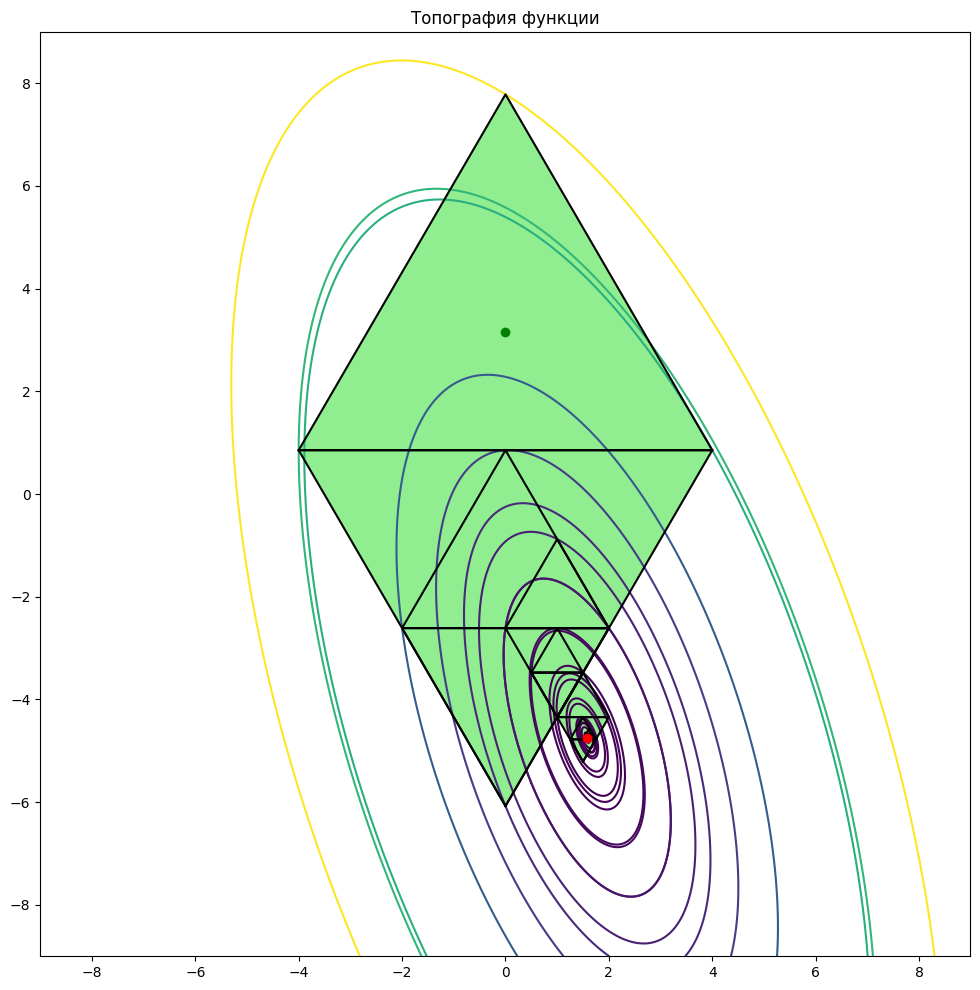

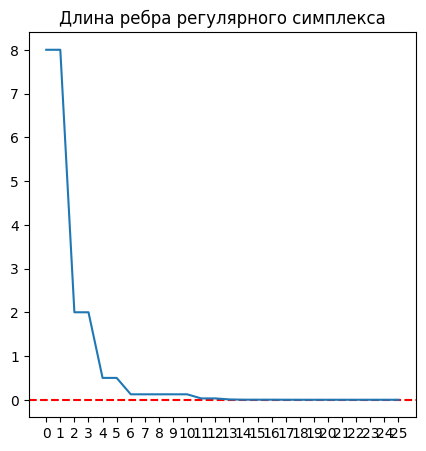

In [ ]:
#Регулярный симплекс

func = 2 # функция: 1 - Розенброка, 2 - квадратичная
if func == 1:
  alpha = 100
  X = np.array([-1, -2])
  F = lambda x, y: alpha * (x ** 2 - y) ** 2 + (x - 1) ** 2 #Ф-я Розенброка
  L = 1
if func == 2:
  X = np.array([0, np.sqrt(10)])
  F = lambda x, y: 11 * x ** 2 + 3 * y ** 2 + 6 * x * y - 2 * np.sqrt(10) * (x - 3 * y) - 22
  L = 8
f = lambda X: F(X[0], X[1])

eps = 1e-5

#счетчики
iterations = 0 #итераций
counter_F = 3 #вычисленных функций


delta = 0.5

S = np.zeros((3, 2))
S_sorted = np.zeros((3, 2))
Func_sorted = np.zeros((3))
S[0, 0] = X[0] - L/2
S[0, 1] = X[1] - L/2/np.sqrt(3)
S[1, 0] = X[0] + L/2
S[1, 1] = X[1] - L/2/np.sqrt(3)
S[2, 0] = X[0]
S[2, 1] = X[1] + L/np.sqrt(3)
Func = np.apply_along_axis(f, 1, S)



dataF = {f(S[0]), f(S[1]), f(S[2])}
SgrafX = np.array([ [S[0][0], S[1][0], S[2][0]] ])
SgrafY = np.array([ [S[0][1], S[1][1], S[2][1]] ])
dataL = np.array([L])
while (L > eps):
  iterations += 1
  S_sorted[0] = S[np.argsort(Func)[0]]
  S_sorted[1] = S[np.argsort(Func)[1]]
  S_sorted[2] = S[np.argsort(Func)[2]]

  Func_sorted = np.sort(Func)

  X_C = (S_sorted[0] + S_sorted[1])/2
  X_new = 2 * X_C - S_sorted[2]
  F_new = f(X_new)
  counter_F += 1

  if F_new >= Func_sorted[2]:
    S[0] = S_sorted[0]
    for i in [1, 2]:
          S[i] = S_sorted[0] + delta * (S_sorted[i] - S_sorted[0])
          Func[i] = f(S[i])
          counter_F += 2
          L *= delta
  else:
    for i in [0, 1]:
      S[i] = S_sorted[i]
      Func[i] = Func_sorted[i]
    S[2] = X_new
    Func[2] = F_new

  SgrafX = np.append(SgrafX, np.array([S[0][0], S[1][0], S[2][0]]))
  SgrafY = np.append(SgrafY, np.array([S[0][1], S[1][1], S[2][1]]))
  dataL = np.append(dataL, L)
X_min = (S[0] + S[1] + S[2])/3

print("==================== " + "Поиск с помощью регулярного симплекса" + " ====================")
print("eps = ", eps)
print("x* = ", X_min[0], X_min[1])
print("f(x*) = ", F(X_min[0], X_min[1]))
print("iterations = ", iterations)
print("counter_F = ", counter_F)

plt.show()
if func == 1:
  x_space = np.arange(-2.5, 2, 0.01)
  y_space = np.arange(-2.5, 2, 0.01)
if func == 2:
  x_space = np.arange(-9, 9, 0.01)
  y_space = np.arange(-9, 9, 0.01)
xgrid, ygrid = np.meshgrid(x_space, y_space)
z = F(xgrid, ygrid)

for i in range(0, len(SgrafX)):
  dataF.add(F(SgrafX[i], SgrafY[i]))
fig = plt.figure(figsize=(12, 12))
axes = fig.add_subplot()
plt.title("Топография функции")
plt.plot(X[0], X[1], "go")
axes.contour(xgrid, ygrid, z, sorted(dataF))
for i in range(0, iterations+1):
  plt.fill([SgrafX[i*3], SgrafX[i*3+1], SgrafX[i*3+2], SgrafX[i*3]], [SgrafY[i*3], SgrafY[i*3+1], SgrafY[i*3+2], SgrafY[i*3]], "#90ee90")
  plt.plot([SgrafX[i*3], SgrafX[i*3+1], SgrafX[i*3+2], SgrafX[i*3]], [SgrafY[i*3], SgrafY[i*3+1], SgrafY[i*3+2], SgrafY[i*3]], "black")
plt.plot(X_min[0], X_min[1], "ro")
plt.show()

fig = plt.figure(figsize=(5, 5))
plt.title("Длина ребра регулярного симплекса")
plt.xticks(np.arange(0, iterations+1, 1.0))
plt.axhline(y=eps, color = 'red', linestyle = "--")
plt.plot(np.arange(0, iterations+1, 1.0), dataL)

==================== Поиск с помощью метода Нелдера-Мида ====================
eps =  1e-05
x* =  1.5813646496216052 -4.74371104436707
f(x*) =  -71.99999957787095
iterations =  29
counter_F =  32


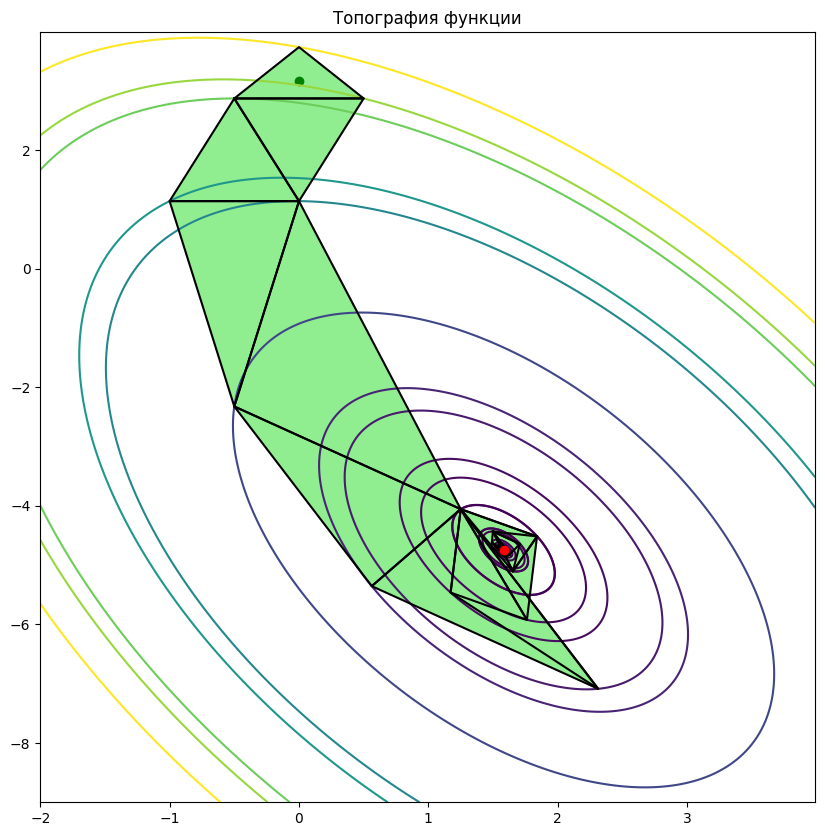

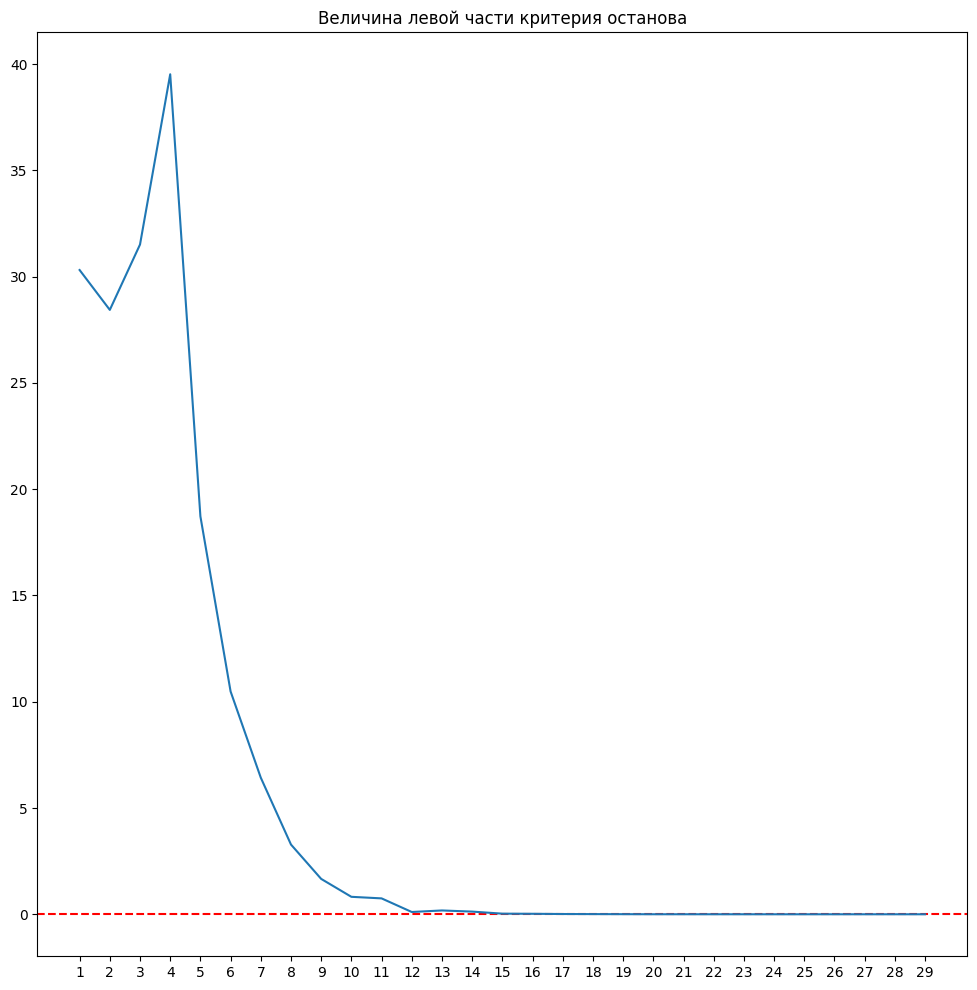

In [ ]:
#Метод Нелдера-Мида

func = 2 # функция: 1 - Розенброка, 2 - квадратичная
if func == 1:
  alpha = 100
  X = np.array([-1, -2])
  F = lambda x, y: alpha * (x ** 2 - y) ** 2 + (x - 1) ** 2 #Ф-я Розенброка
if func == 2:
  X = np.array([0, np.sqrt(10)])
  F = lambda x, y: 11 * x ** 2 + 3 * y ** 2 + 6 * x * y - 2 * np.sqrt(10) * (x - 3 * y) - 22

f = lambda X: F(X[0], X[1])

eps = 1e-5
#счетчики
iterations = 0 #итераций
counter_F = 3 #вычисленных функций
L = 1.0
delta, a, b, g = 0.5, 1.0, 2.0, 0.5

S = np.zeros((3, 2))
S_sorted = np.zeros((3, 2))
Func_sorted = np.zeros((3))
S[0, 0] = X[0] - L/2
S[0, 1] = X[1] - L/2/np.sqrt(3)
S[1, 0] = X[0] + L/2
S[1, 1] = X[1] - L/2/np.sqrt(3)
S[2, 0] = X[0]
S[2, 1] = X[1] + L/np.sqrt(3)
Func = np.apply_along_axis(f, 1, S)

dataF = {f(S[0]), f(S[1]), f(S[2])}
SgrafX = np.array([ [S[0][0], S[1][0], S[2][0]] ])
SgrafY = np.array([ [S[0][1], S[1][1], S[2][1]] ])
dataL = np.array([])

S_sorted[0] = S[np.argsort(Func)[0]]
S_sorted[1] = S[np.argsort(Func)[1]]
S_sorted[2] = S[np.argsort(Func)[2]]

Func_sorted = np.sort(Func)

X_C = (S_sorted[0] + S_sorted[1])/2.0

while (True):
  iterations += 1
  X_new = X_C + a * (X_C - S_sorted[2]) #Отображение точки
  F_new = f(X_new)
  counter_F += 1

  if F_new < Func_sorted[0]:   #Растяжение
    X1_new = X_C + b * (X_new - X_C)
    if f(X1_new) < Func_sorted[0]:
      X_new = X1_new
      F_new = f(X_new)

    for i in range(2):
      S[i] = S_sorted[i]
      Func[i] = Func_sorted[i]
    S[2] = X_new
    Func[2] = F_new


  elif F_new > Func_sorted[1]:    #Сжатие
    if F_new <= Func_sorted[2]:
      X2_new = X_C + g * (X_new - X_C)
    else:
      X2_new = X_C + g * (S_sorted[2] - X_C)

    if f(X2_new) < Func_sorted[2]:
      for i in [0, 1]:
        S[i] = S_sorted[i]
        Func[i] = Func_sorted[i]
      S[2] = X2_new
      Func[2] = f(X2_new)

    else:                       #Редукция
      S[0] = S_sorted[0]
      for i in [1, 2]:
        S[i] = S_sorted[0] + delta * (S_sorted[i] - S_sorted[0])
        Func[i] = f(S[i])
        counter_F += 2
        L *= delta

  else:                     #Ничего не делаем, оставляем новую точку
    for i in range(2):
      S[i] = S_sorted[i]
      Func[i] = Func_sorted[i]
    S[2] = X_new
    Func[2] = F_new

  SgrafX = np.append(SgrafX, np.array([S[0][0], S[1][0], S[2][0]]))
  SgrafY = np.append(SgrafY, np.array([S[0][1], S[1][1], S[2][1]]))


  S_sorted[0] = S[np.argsort(Func)[0]]
  S_sorted[1] = S[np.argsort(Func)[1]]
  S_sorted[2] = S[np.argsort(Func)[2]]

  Func_sorted = np.sort(Func)

  X_C = (S_sorted[0] + S_sorted[1])/2.0

  sm = 0
  for i in range(3):
    sm += (Func_sorted[i] - f(X_C))**2
  dataL = np.append(dataL, (sm/3.0) ** 0.5)
  #if iterations == 9:
    #break
  if (sm / 3.0) < (eps ** 2):
    X_min = (S[0] + S[1] + S[2]) / 3.0
    break
X_min = (S[0] + S[1] + S[2]) / 3.0


print("==================== " + "Поиск с помощью метода Нелдера-Мида" + " ====================")
print("eps = ", eps)
print("x* = ", X_min[0], X_min[1])
print("f(x*) = ", F(X_min[0], X_min[1]))
print("iterations = ", iterations)
print("counter_F = ", counter_F)

plt.show()
if func == 1:
  x_space = np.arange(-2.5, 2, 0.01)
  y_space = np.arange(-2.5, 2, 0.01)
if func == 2:
  x_space = np.arange(-2, 4, 0.01)
  y_space = np.arange(-9, 4, 0.01)
xgrid, ygrid = np.meshgrid(x_space, y_space)
z = F(xgrid, ygrid)

for i in range(0, len(SgrafX)):
  dataF.add(F(SgrafX[i], SgrafY[i]))
fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot()
plt.title("Топография функции")
plt.plot(X[0], X[1], "go")
axes.contour(xgrid, ygrid, z, sorted(dataF))
for i in range(0, iterations+1):
  plt.fill([SgrafX[i*3], SgrafX[i*3+1], SgrafX[i*3+2], SgrafX[i*3]], [SgrafY[i*3], SgrafY[i*3+1], SgrafY[i*3+2], SgrafY[i*3]], "#90ee90")
  plt.plot([SgrafX[i*3], SgrafX[i*3+1], SgrafX[i*3+2], SgrafX[i*3]], [SgrafY[i*3], SgrafY[i*3+1], SgrafY[i*3+2], SgrafY[i*3]], "black")
plt.plot(X_min[0], X_min[1], "ro")
plt.show()
fig = plt.figure(figsize=(12, 12))
plt.title("Величина левой части критерия останова")
plt.xticks(np.arange(1, iterations+1, 1.0))
plt.axhline(y=eps, color = 'red', linestyle = "--")
plt.plot(np.arange(1, iterations+1, 1.0), dataL)
